In [2]:
from keras.datasets import imdb
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
import matplotlib.pyplot as plt
from keras import optimizers
from keras import losses
from keras import metrics
from keras import layers

З 9го модуля:

In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

print(x_train.shape)

(25000, 10000)


In [6]:
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)


Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5406 - accuracy: 0.7685 - val_loss: 0.4350 - val_accuracy: 0.8213
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3334 - accuracy: 0.8889 - val_loss: 0.3247 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2446 - accuracy: 0.9180 - val_loss: 0.2850 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1947 - accuracy: 0.9347 - val_loss: 0.3682 - val_accuracy: 0.8470
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1630 - accuracy: 0.9474 - val_loss: 0.2842 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1360 - accuracy: 0.9573 - val_loss: 0.2918 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1153 - accuracy: 0.9644 - val_loss: 0.3386 - val_accuracy: 0.8763
Epoch 8/20
30

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


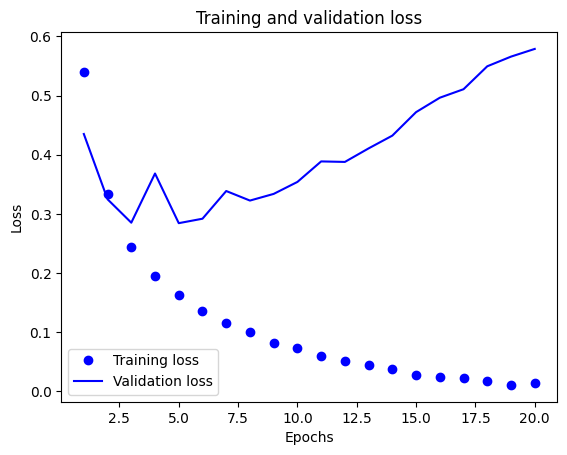

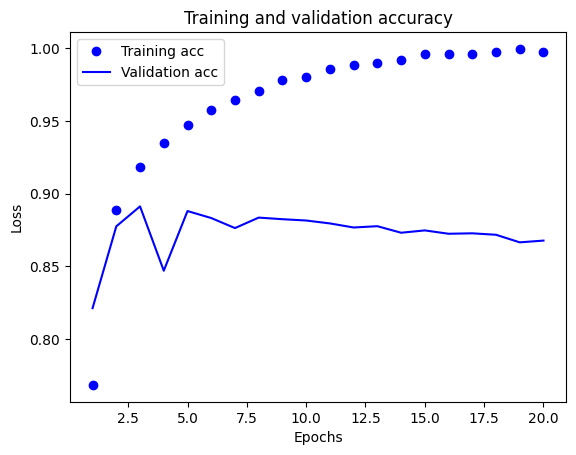

In [10]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [11]:
results = model.evaluate(x_test, y_test)
print(results)


782/782 [==============================] - 2s 3ms/step - loss: 0.4548 - accuracy: 0.8632
[0.4547652006149292, 0.8631600141525269]


In [12]:
max_features = 10000
maxlen = 500
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)


RNN

In [13]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

LSTM

In [14]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Двостороння з використанням LSTM


In [15]:
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Embedding(max_features, 32))
model_bidirectional_lstm.add(Bidirectional(LSTM(32)))
model_bidirectional_lstm.add(Dense(1, activation='sigmoid'))
model_bidirectional_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


Глибока з використанням LSTM

In [16]:
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 32))
model_deep_lstm.add(LSTM(64, return_sequences=True))
model_deep_lstm.add(LSTM(64))
model_deep_lstm.add(Dense(1, activation='sigmoid'))
model_deep_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [17]:
history_rnn = model_rnn.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
history_lstm = model_lstm.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
history_bidirectional_lstm = model_bidirectional_lstm.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
history_deep_lstm = model_deep_lstm.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 34s 203ms/step - loss: 0.6141 - acc: 0.6539 - val_loss: 0.5011 - val_acc: 0.7610
Epoch 2/10
157/157 [==============================] - 26s 167ms/step - loss: 0.3996 - acc: 0.8332 - val_loss: 0.4803 - val_acc: 0.7638
Epoch 3/10
157/157 [==============================] - 25s 156ms/step - loss: 0.3189 - acc: 0.8705 - val_loss: 0.3544 - val_acc: 0.8518
Epoch 4/10
157/157 [==============================] - 24s 156ms/step - loss: 0.2534 - acc: 0.9024 - val_loss: 0.4689 - val_acc: 0.7836
Epoch 5/10
157/157 [==============================] - 25s 161ms/step - loss: 0.2099 - acc: 0.9212 - val_loss: 0.3787 - val_acc: 0.8436
Epoch 6/10
157/157 [==============================] - 25s 156ms/step - loss: 0.1600 - acc: 0.9421 - val_loss: 0.4531 - val_acc: 0.8136
Epoch 7/10
157/157 [==============================] - 25s 159ms/step - loss: 0.1182 - acc: 0.9591 - val_loss: 0.5179 - val_acc: 0.8146
Epoch 8/10
157/157 [==============================] - 2

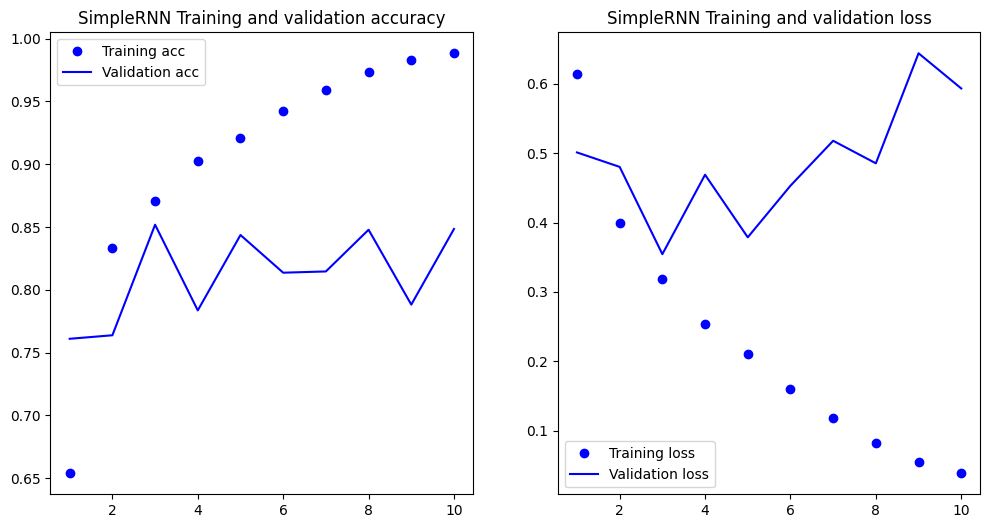

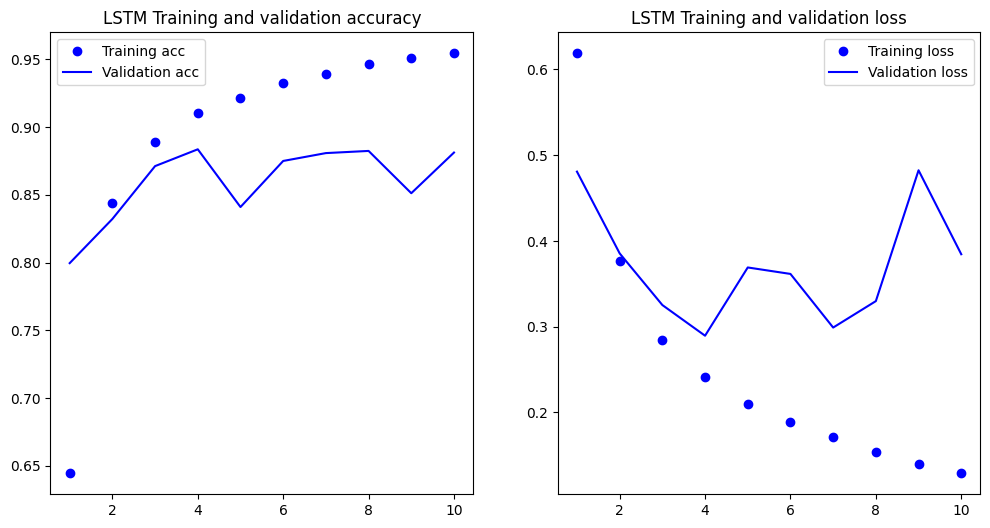

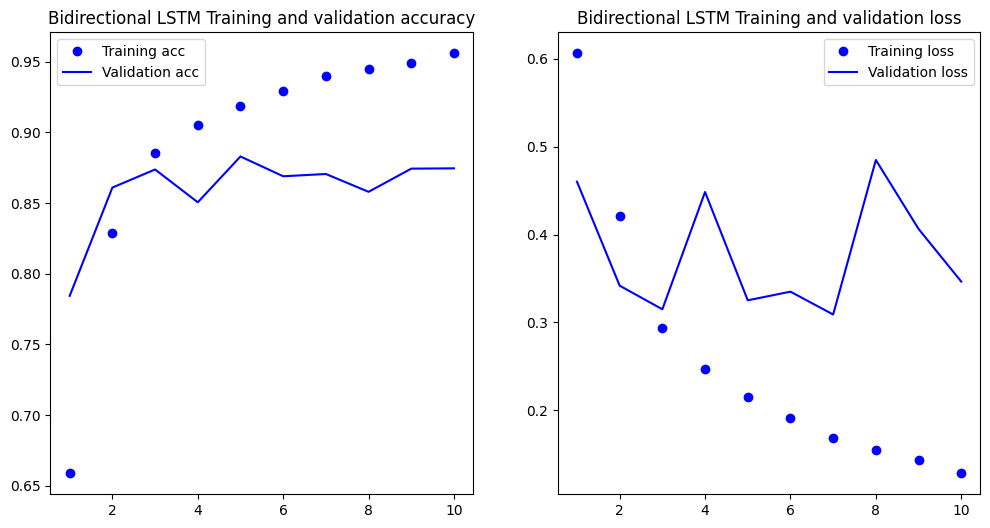

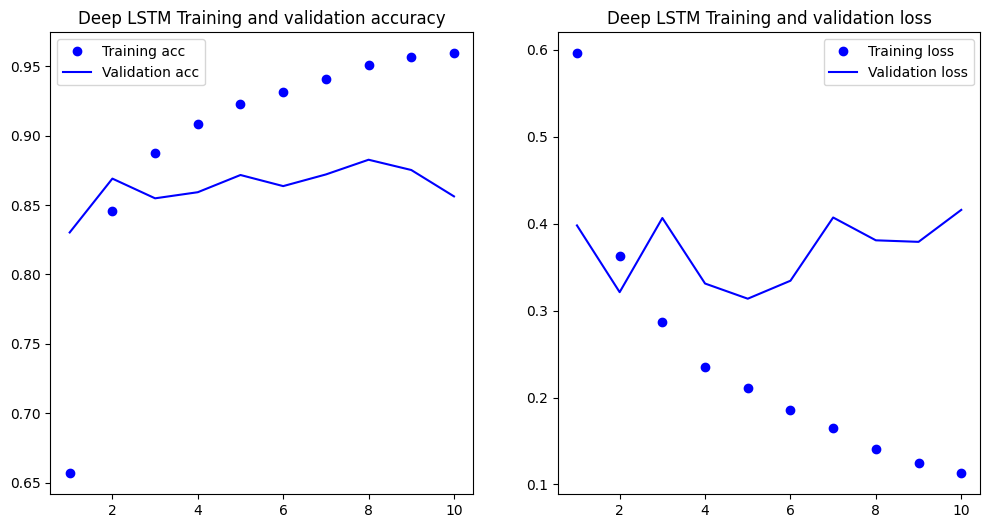

In [18]:
def plot_history(history, model_name):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'{model_name} Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name} Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history_rnn, 'SimpleRNN')
plot_history(history_lstm, 'LSTM')
plot_history(history_bidirectional_lstm, 'Bidirectional LSTM')
plot_history(history_deep_lstm, 'Deep LSTM')


In [19]:
results_rnn = model_rnn.evaluate(input_test, y_test)
results_lstm = model_lstm.evaluate(input_test, y_test)
results_bidirectional_lstm = model_bidirectional_lstm.evaluate(input_test, y_test)
results_deep_lstm = model_deep_lstm.evaluate(input_test, y_test)

print("Results for SimpleRNN:", results_rnn)
print("Results for LSTM:", results_lstm)
print("Results for Bidirectional LSTM:", results_bidirectional_lstm)
print("Results for Deep LSTM:", results_deep_lstm)


782/782 [==============================] - 108s 138ms/step - loss: 0.4221 - acc: 0.8542
Results for SimpleRNN: [0.5804076790809631, 0.8451200127601624]
Results for LSTM: [0.4396251440048218, 0.8628799915313721]
Results for Bidirectional LSTM: [0.37322014570236206, 0.8693600296974182]
Results for Deep LSTM: [0.4221446216106415, 0.8541600108146667]
